In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import pandas as pd
import os
import sys
import numpy as np
sys.path.append("../../Code")
import utils
import files as f
import seaborn as sns
import matplotlib.pyplot as plt
stopWords = set(stopwords.words('english'))

In [3]:
vocab_reviews = pd.read_csv(os.path.join('..','2','len_lang_restrict_reviews.csv'), index_col=0)
vocab_guests = pd.read_csv(os.path.join('..','2','len_lang_restrict_guests.csv'), index_col=0)
vocab_hosts = pd.read_csv(os.path.join('..','2','len_lang_restrict_hosts.csv'), index_col=0)
vocab_guests['id'] = vocab_guests['id'].astype(str)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data = pd.concat([vocab_guests[['id', 'description']], vocab_hosts[['id', 'about']].rename(columns={'about': 'description'})]).reset_index()

In [6]:
len(data)

114019

In [7]:
data = data.drop_duplicates()

In [8]:
len(data)

114018

In [9]:
len(data[data.description.isnull()])

50521

In [10]:
format(50521*100/114018, '.2f')

'44.31'

In [11]:
data = data[~data.description.isnull()]

In [13]:
pd.options.display.max_colwidth = 500

## STILL DO : How many are guests , how many are hosts 

In [34]:
print('Blank Host profiles: %.2f %%' % float(len(vocab_hosts[vocab_hosts['about'].isnull()])*100/len(vocab_hosts)))

Blank Host profiles: 38.76 %


In [35]:
print('Blank Guest profiles: %.2f %%' % float(len(vocab_guests[vocab_guests['description'].isnull()])*100/len(vocab_guests)))

Blank Guest profiles: 44.92 %


# STILL TO DO : How many are hosts and Guests

In [36]:
h_and_g = set(vocab_guests['id']).intersection(set(vocab_hosts['id']))

In [37]:
len(h_and_g)

160

# Create Vocabulary 

In [38]:
profiles_encoded, vocab_count, vocab, idf = pipeline(data, 'description', stopWords)

In [40]:
vocab_table = create_vocab_count_table(vocab_count)

In [291]:
vocab_table.sort_values(by='counts', ascending=False).head(50)

,counts,word
90,28258,love
54,23406,I'm
164,21194,travel
158,15685,new
165,12145,like
76,11546,people
48,10148,live
188,10020,work
70,9603,years
199,9314,enjoy


In [288]:
len(vocab)

62287

In [42]:
inverted_vocab = utils.invert_dict(vocab)

In [43]:
data.description[1]

'(Website hidden by Airbnb) '

In [44]:
profiles_encoded[data.id[1]]

[4, 5, 6]

In [45]:
vocab['Website']

4

# Load Relevant profiles

In [239]:
reviews = pd.read_csv(os.path.join('..','2','nr_restrict_reviews.csv'), index_col=0)
guests = pd.read_csv(os.path.join('..','2','nr_restrict_guests.csv'), index_col=0)
hosts = pd.read_csv(os.path.join('..','2','nr_restrict_hosts.csv'), index_col=0)
guests['id'] = guests['id'].astype(str)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [275]:
listings = pd.read_csv(os.path.join('..','2','nr_restrict_listings.csv'), index_col=0)

## Vector Representations

### Bag of Words - Vocabulary

#### Setup

In [178]:
profiles_vec = create_representation_bow(profiles_encoded, len(vocab))

In [179]:
profiles_freq = create_representation_bow(profiles_encoded, len(vocab), 'frequency')

#### Test

## Language Model Representation

#### Setup 

In [240]:
len(hosts)

6926

In [241]:
hosts = hosts[~hosts['about'].isnull()]

In [242]:
100 - len(hosts)*100/6926

31.87987294253537

In [243]:
len(guests)

101288

In [244]:
guests = guests[~guests['description'].isnull()]

In [245]:
100 - len(guests)*100/101288

44.89278098096517

In [246]:
len(reviews)

215960

In [15]:
reviews = reviews[(reviews['recipient_id'].astype(str).isin(hosts['id'].unique())) & (reviews['reviewer_id'].astype(str).isin(guests['id'].unique()))]

NameError: name 'reviews' is not defined

In [249]:
len(reviews)

49566

In [250]:
100 - len(reviews)*100/215960

77.04852750509353

In [114]:
hosts[hosts['id'] == 8967]

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count,num_of_cancellations
7,8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within a few hours,100%,f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,1,3.0


# Distribution of Host About Length 

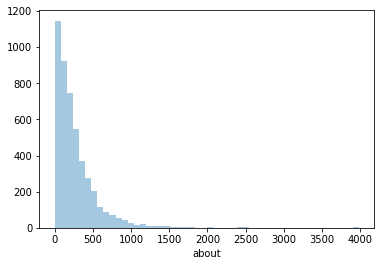

In [254]:
sns.distplot(hosts['about'].str.len(), kde=False)
plt.show()

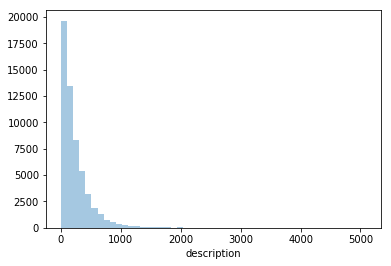

In [255]:
sns.distplot(guests['description'].str.len(), kde=False)
plt.show()

## Distance 1: Compute Cosine Similarity 

#### Add Cosine Similarity to Feature Table

In [256]:
reviews_X = add_cosine_similarity(reviews, profiles_vec)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [257]:
import numpy as np
np.set_printoptions(threshold=np.nan)

In [258]:
cosine_similarity(vec_x=profiles_vec['8967'], vec_y=profiles_vec['1784456'])

0.0

In [259]:
reviews_X = add_tfidf(reviews_X, profiles_vec, profiles_freq, idf)

#### Add Sentiment Scores

In [261]:
sent_reviews = pd.read_csv(os.path.join('..','7','sent_avgs.csv'), index_col=0)

In [267]:
reviews_X = reviews_X.join(sent_reviews[['id', 'avg_match_4']].set_index('id'), on='id')

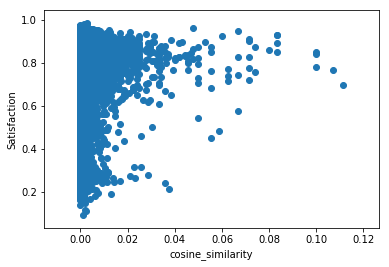

In [272]:
plt.scatter(reviews_X['cosine_similarity'], reviews_X['avg_match_4'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

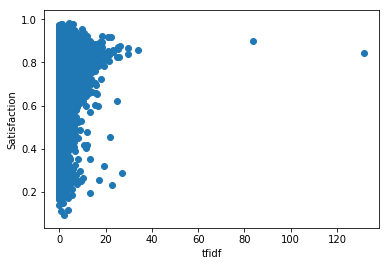

In [273]:
plt.scatter(reviews_X['tfidf'], reviews_X['avg_match_4'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()

In [278]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [279]:
listings_full = listings[listings['room_type'] == 'Entire home/apt']

In [280]:
listings_shared = listings[listings['room_type'] != 'Entire home/apt']

In [281]:
reviews_full = reviews_X[reviews_X['listing_id'].isin(listings_full['id'].unique())]

In [283]:
reviews_shared = reviews_X[reviews_X['listing_id'].isin(listings_shared['id'].unique())]

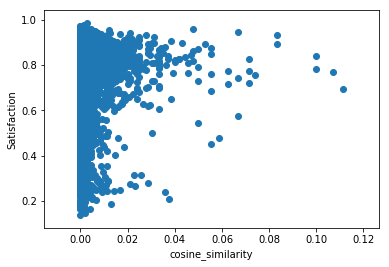

In [284]:
plt.scatter(reviews_full['cosine_similarity'], reviews_full['avg_match_4'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

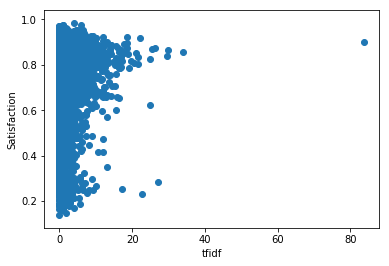

In [285]:
plt.scatter(reviews_full['tfidf'], reviews_full['avg_match_4'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()

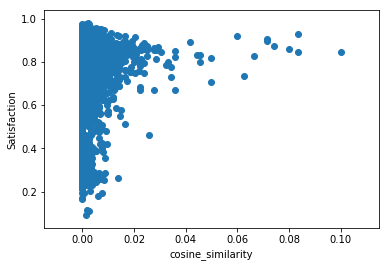

In [286]:
plt.scatter(reviews_shared['cosine_similarity'], reviews_shared['avg_match_4'])
plt.xlabel('cosine_similarity')
plt.ylabel('Satisfaction')
plt.show()

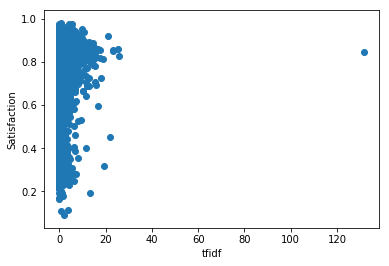

In [287]:
plt.scatter(reviews_shared['tfidf'], reviews_shared['avg_match_4'])
plt.xlabel('tfidf')
plt.ylabel('Satisfaction')
plt.show()

# Airbnb

In [139]:
abnbvocab =  pd.read_csv(os.path.join('..','..', 'Tools','mydict.tsv'), delimiter="\t", index_col=0)

In [147]:
def bow_airbnb(text, vocab):
    vec = []
    ltext = text.lower()
    return list([1 if w in ltext else 0 for w in vocab])

In [172]:
def freq_airbnb(text, vocab):
    vec = np.zeros(len(vocab))
    ltext = text.lower()
    tokenized =  utils.tokenize(text)
    for token in tokenized:
        if token in vocab:
            vec[list(vocab).index(token)] += 1
    return vec

In [ ]:
bow_airbnb(r['description'], abnbvocab.index)

In [292]:
bow_abnb = {r['id'] :bow_airbnb(r['description'], abnbvocab.index) for i, r in data.iterrows() }

In [293]:
freq_abnb = {r['id'] :freq_airbnb(r['description'], abnbvocab.index) for i, r in data.iterrows() }

In [68]:
profiles_lms = create_lm_dict(data, 'description', abnbvocab.index)